# Calculating Bias and Variance

In this Notebook you are going to calculate the bias and variance of your
trained model

## How to Re-sample data
You have been provided a dataset consisting of pairs (xi, yi). It can be loaded
into your python program using pickle.load() function. Split the dataset into
training and testing(90:10 split). Now divides the train set into 10 equal
parts randomly, so that you will get 10 different dataset to train your model.

In [198]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
# open a file, where the pickled data stored 
file = open('Q1_data/data.pkl', 'rb')

# load information from that file(deserializing)
q1_data = pickle.load(file)

# close the file
file.close()
# q1_data = pickle.load('Q1_data/data.pkl')
q1_data

array([[ 0.00000000e+00,  2.00000000e+00],
       [ 1.00000000e-03,  2.02599961e+00],
       [ 2.00000000e-03,  2.05199691e+00],
       ...,
       [ 4.99700000e+00, -2.19781538e+01],
       [ 4.99800000e+00, -2.19609488e+01],
       [ 4.99900000e+00, -2.19436572e+01]])

In [199]:
q1_data.shape

(5000, 2)

- choose random indeces to take random values from data to training and testing

In [200]:
# choose the training indeces
training_size = q1_data.shape[0]*9 // 10
training_choices = np.random.choice(range(q1_data.shape[0]), size=(training_size,), replace=False)
training_choices.shape

(4500,)

In [201]:
# split to training set
training_set = q1_data[training_choices, :]
training_set.shape

(4500, 2)

In [202]:
# choose testing data randomly
rest_indeces = np.array([i for i in range(q1_data.shape[0]) if i not in training_choices])
testing_set = q1_data[rest_indeces, :]
testing_set.shape

(500, 2)

- split training data into 10 equal parts randomly

In [203]:
#  the list of 10 datasets
diff_training_datasets = [] 
step = len(training_set) // 10
for i in range(0, len(training_set), step):
    diff_training_datasets.append(training_set[i: i + step])

for i in diff_training_datasets:
    print(i.shape)

(450, 2)
(450, 2)
(450, 2)
(450, 2)
(450, 2)
(450, 2)
(450, 2)
(450, 2)
(450, 2)
(450, 2)


## Task:
- After re-sampling data, you have 11 different datasets ( 10 train sets and 1
test set). Train a linear classifier on each of the 10 train set separately, so
that you have 10 different classifiers or models. You have 10 different models
or classifiers trained separately on 10 different training set, so now you can
calculate the bias and variance of the model. You need to repeat the above
process for the following class of functions.
- 1.2.1 y = mx + c
- 1.2.2 y = ax2 + bx + c
- 1.2.3 y = ax4 + bx3 + cx2 + dx + e
- And so on up till polynomial of degree 9. You are only supposed to use
sklearn’s linear_model.LinearRegression().fit() for finding the appropriate
coefficients with the default parameters. Tabulate the values of
bias and variance and also write a detailed report explaining how bias
and variance changes as you vary your function classes.
Note: Whenever we are talking about the bias and variance of model, it
refers to the average bias and variance of the model over all the test points.


In [204]:
def split_transform(k_fold):
        x_train = k[:, 0].reshape(-1, 1)
        y_train = k[:, 1]
        x_test = testing_set[:, 0].reshape(-1, 1)
        y_test = testing_set[:, 1]
        return poly.fit_transform(x_train), y_train, poly.fit_transform(x_test), y_test

Model degree 1 with different datasets:


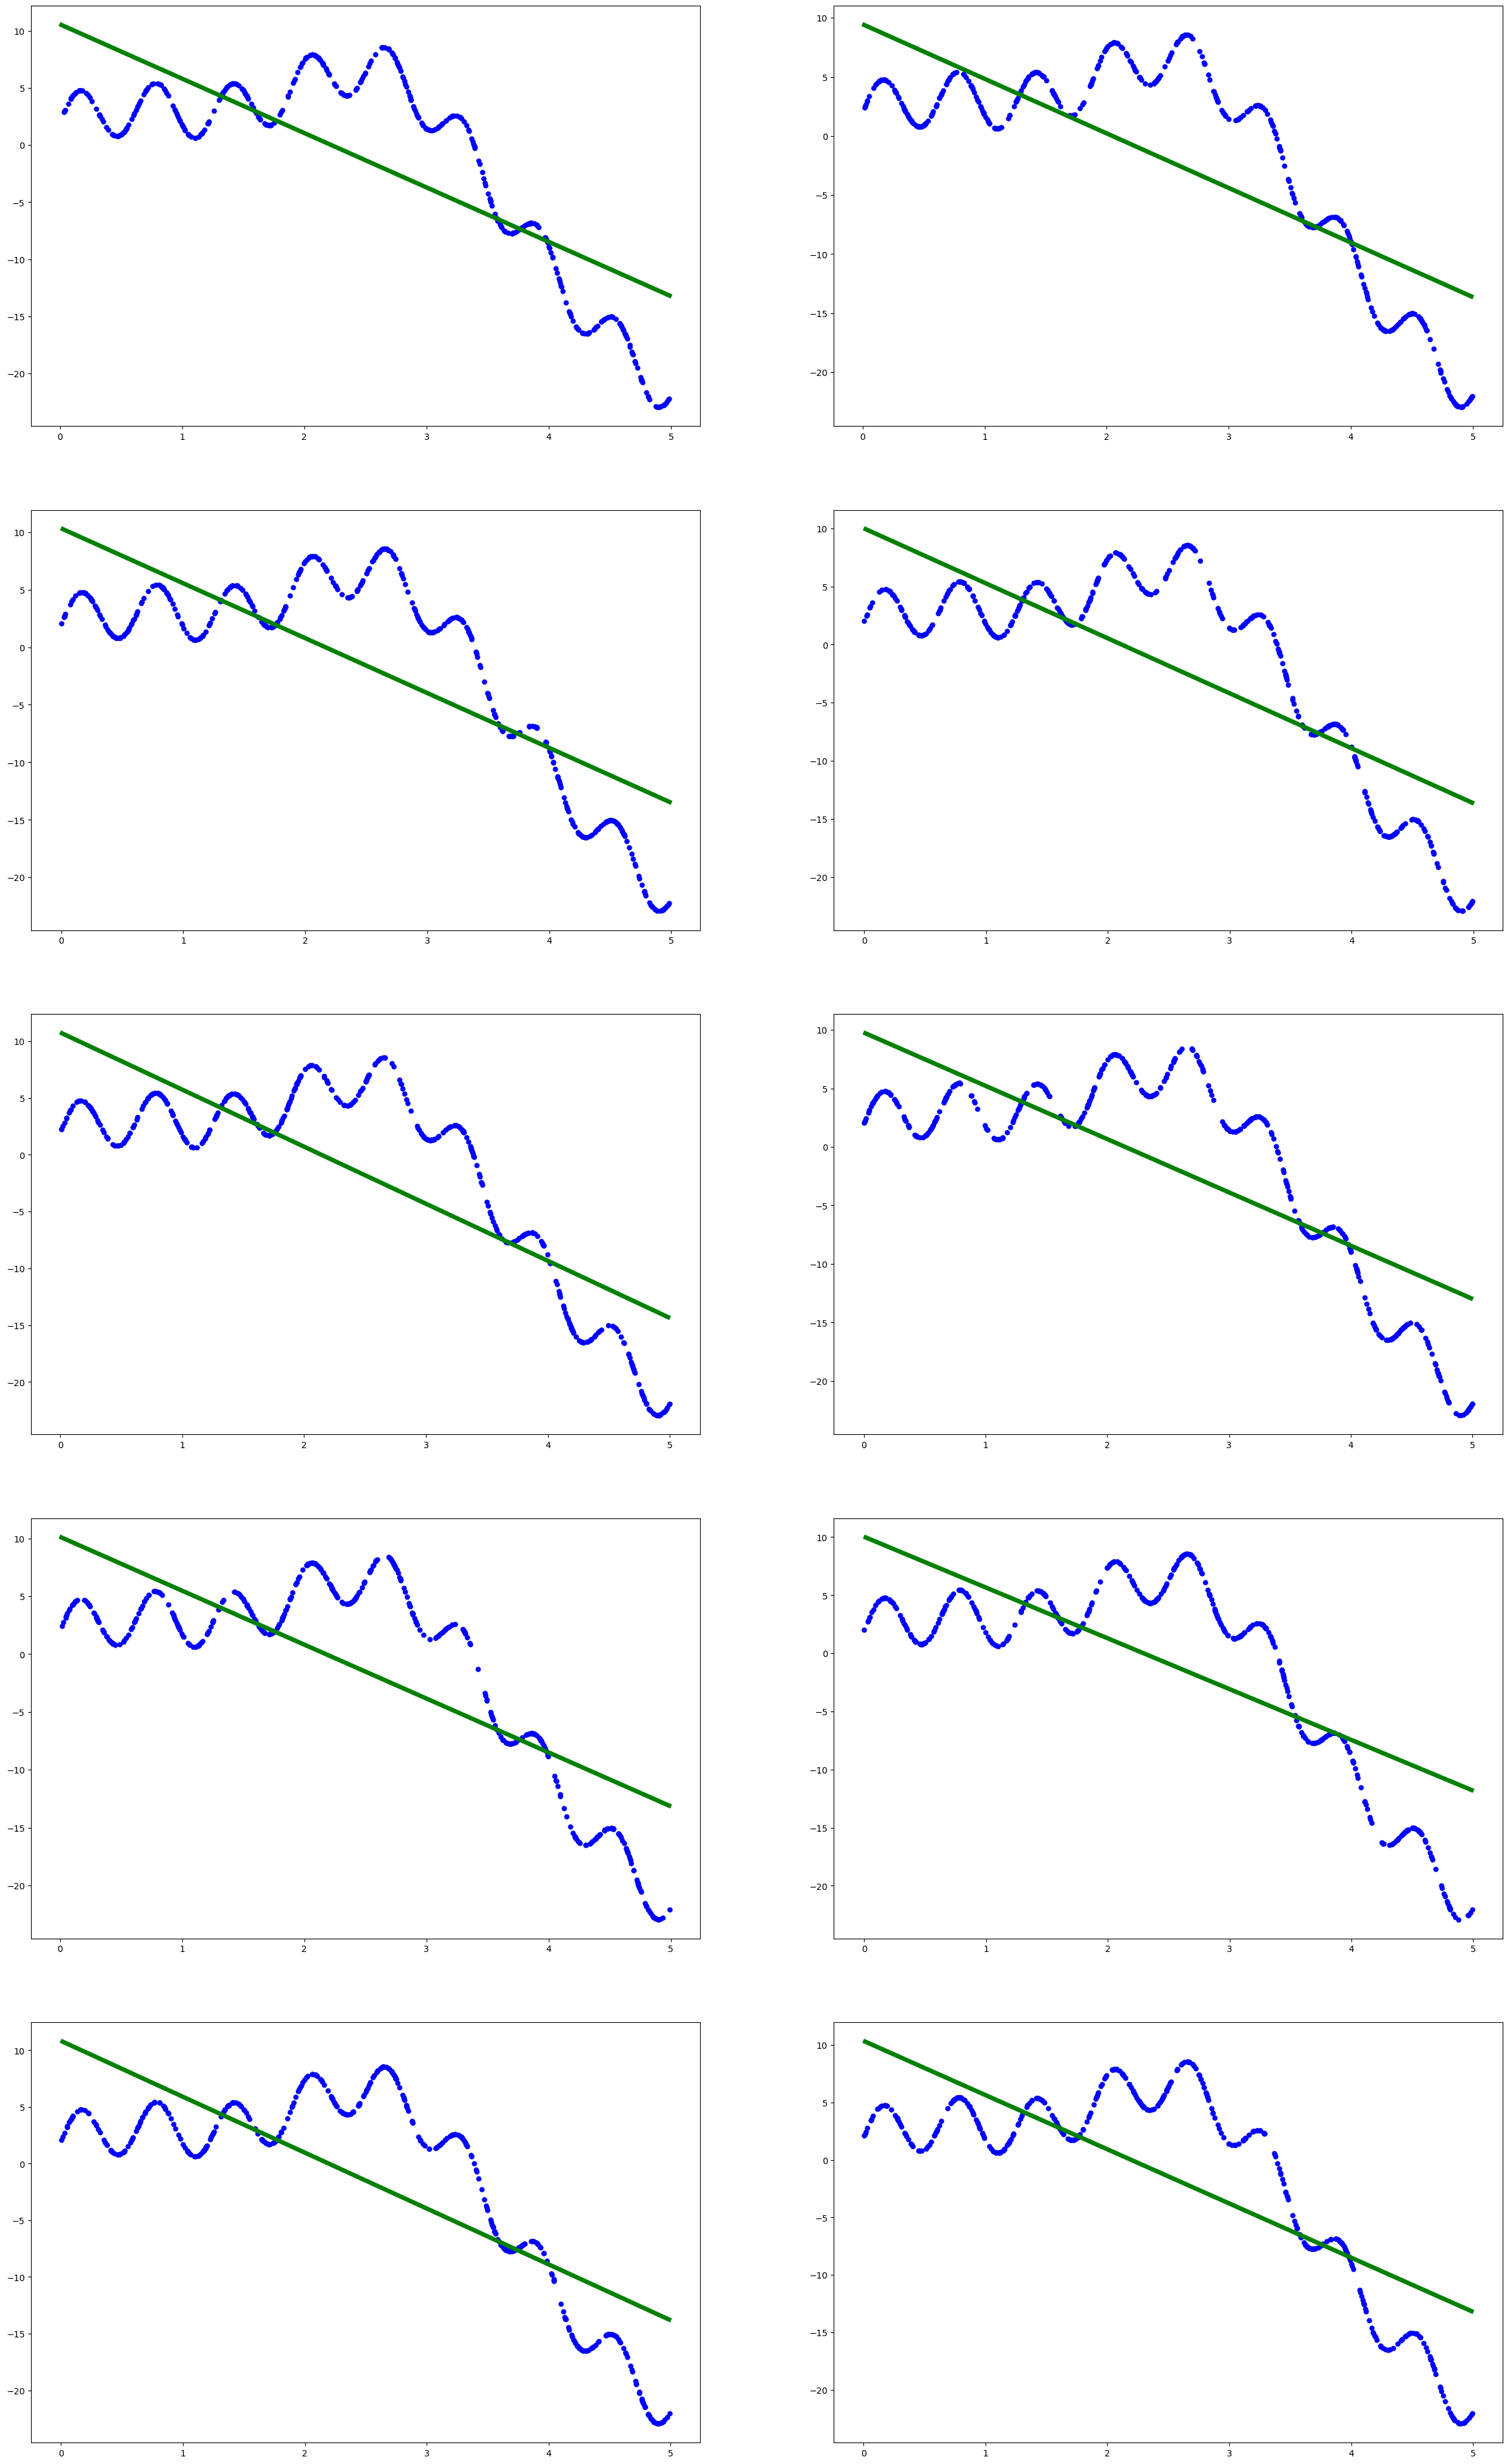

Model degree 2 with different datasets:


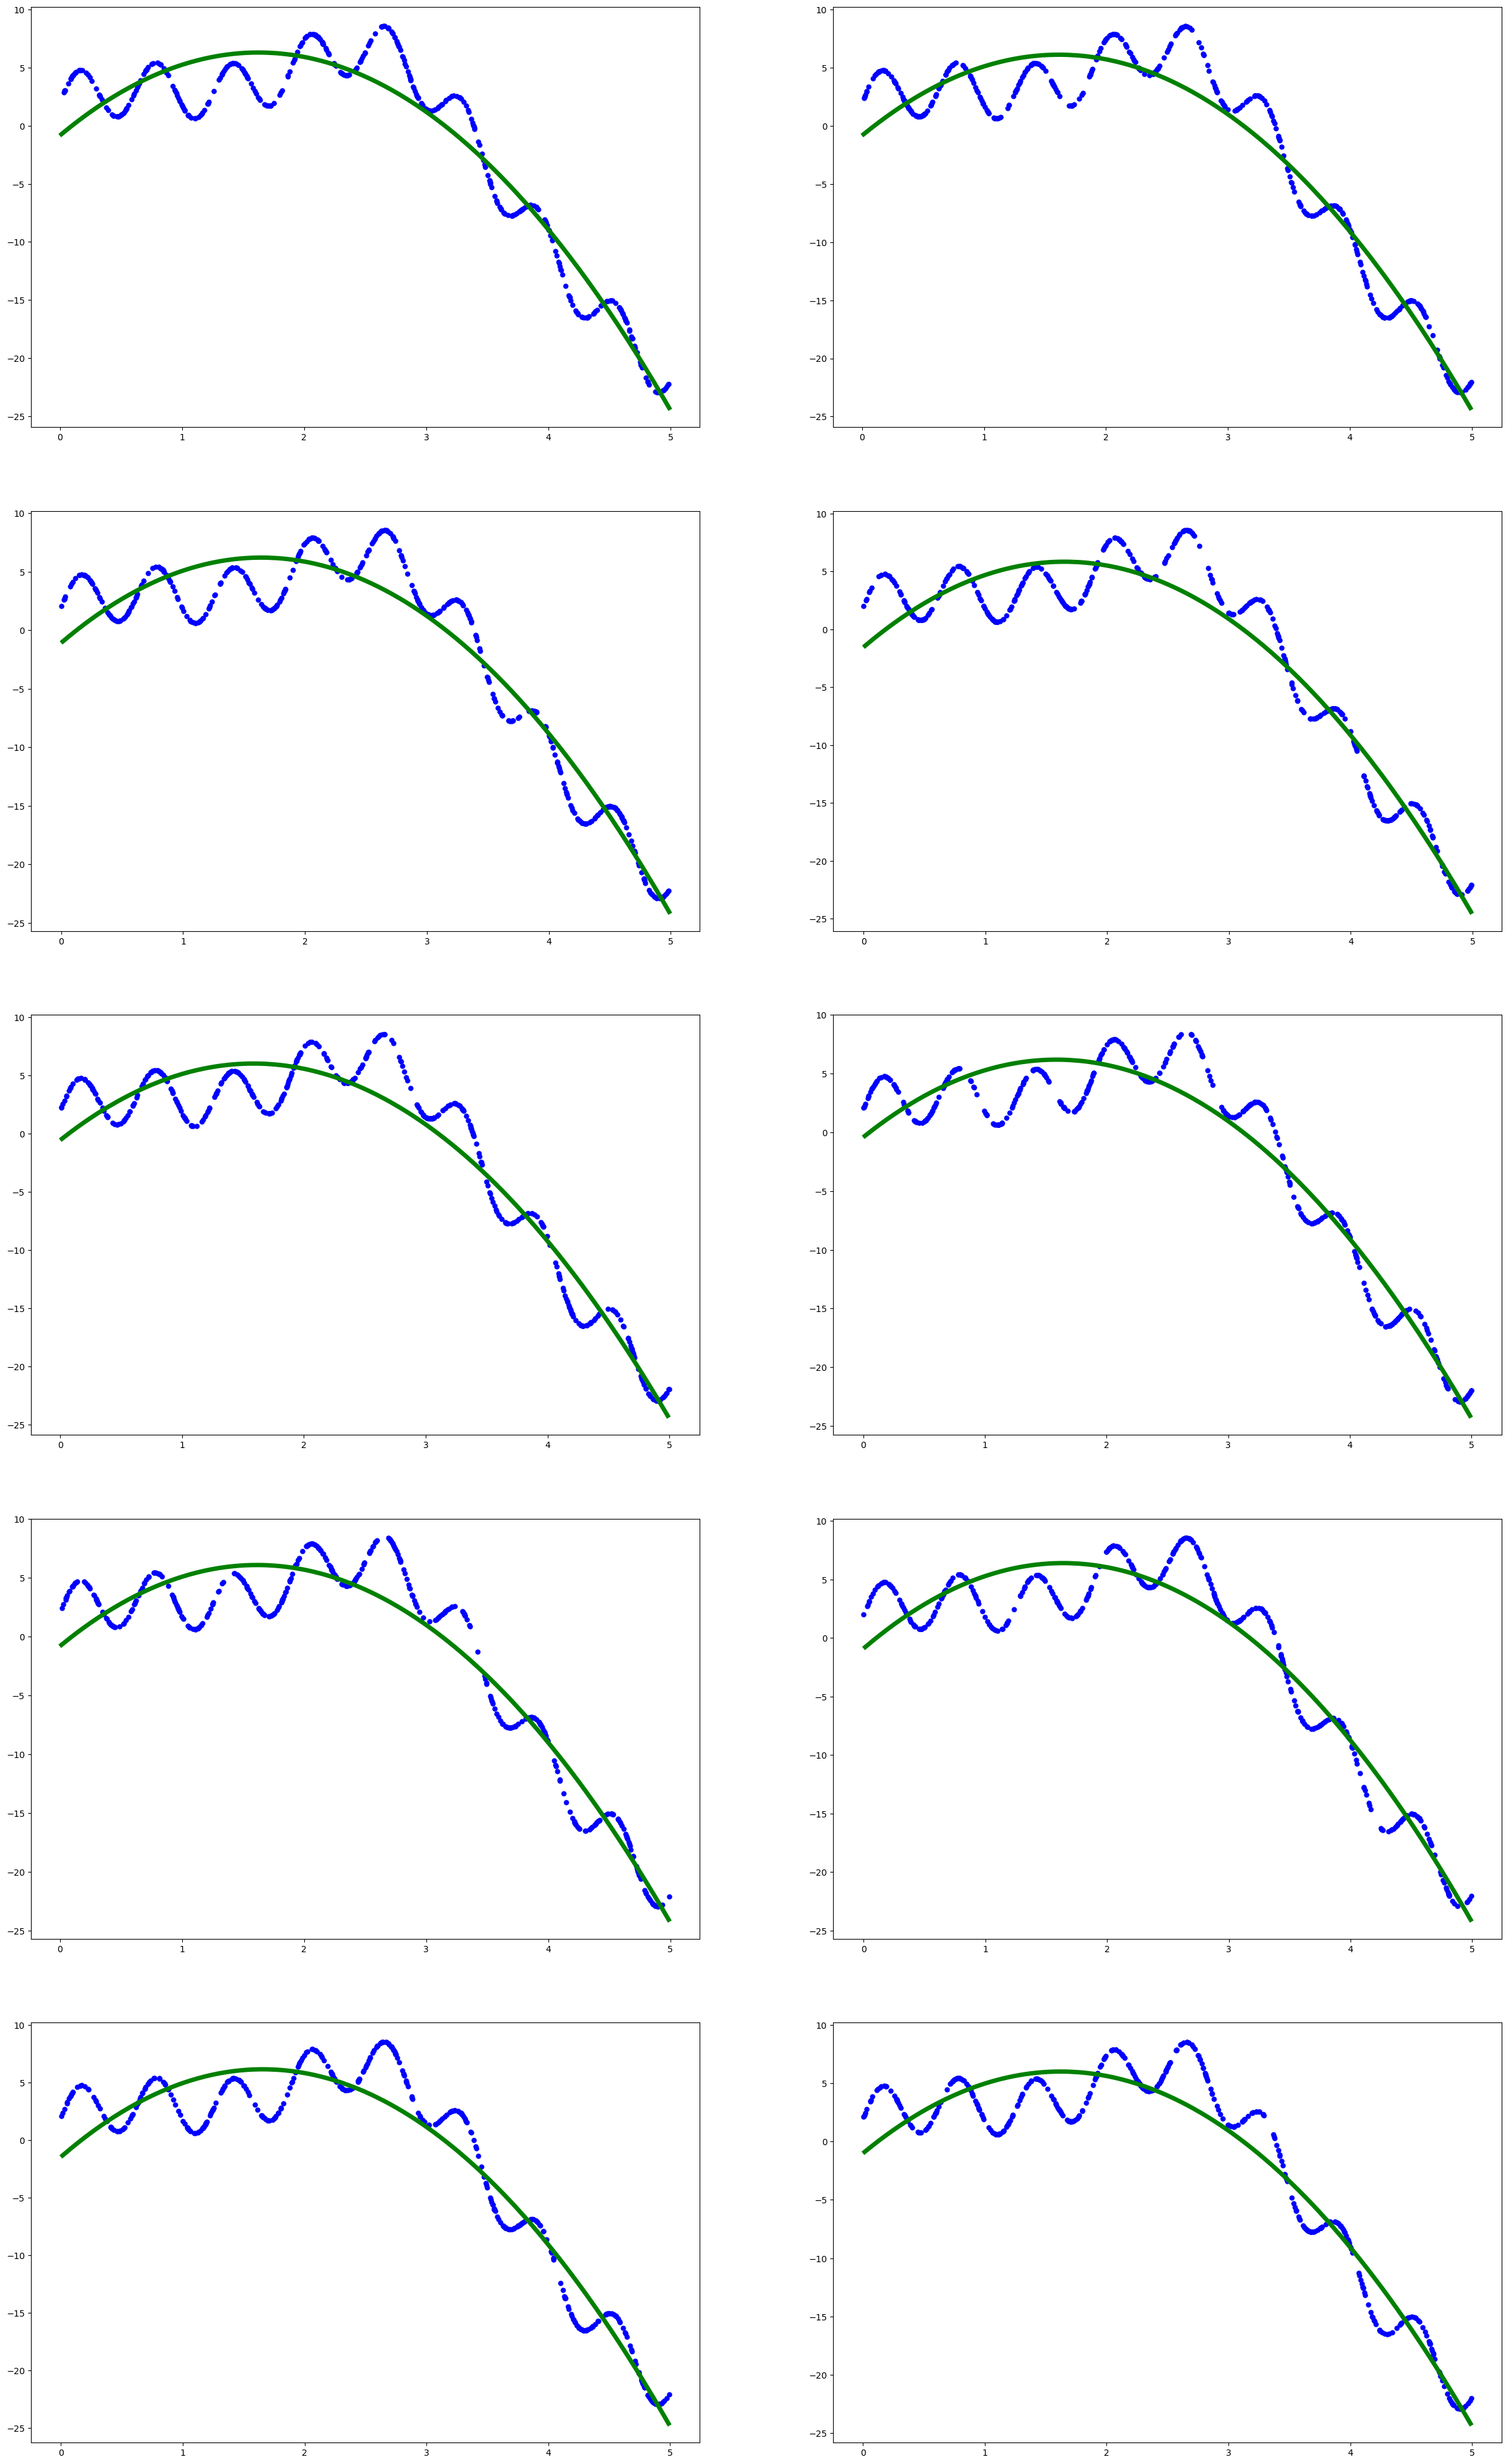

Model degree 3 with different datasets:


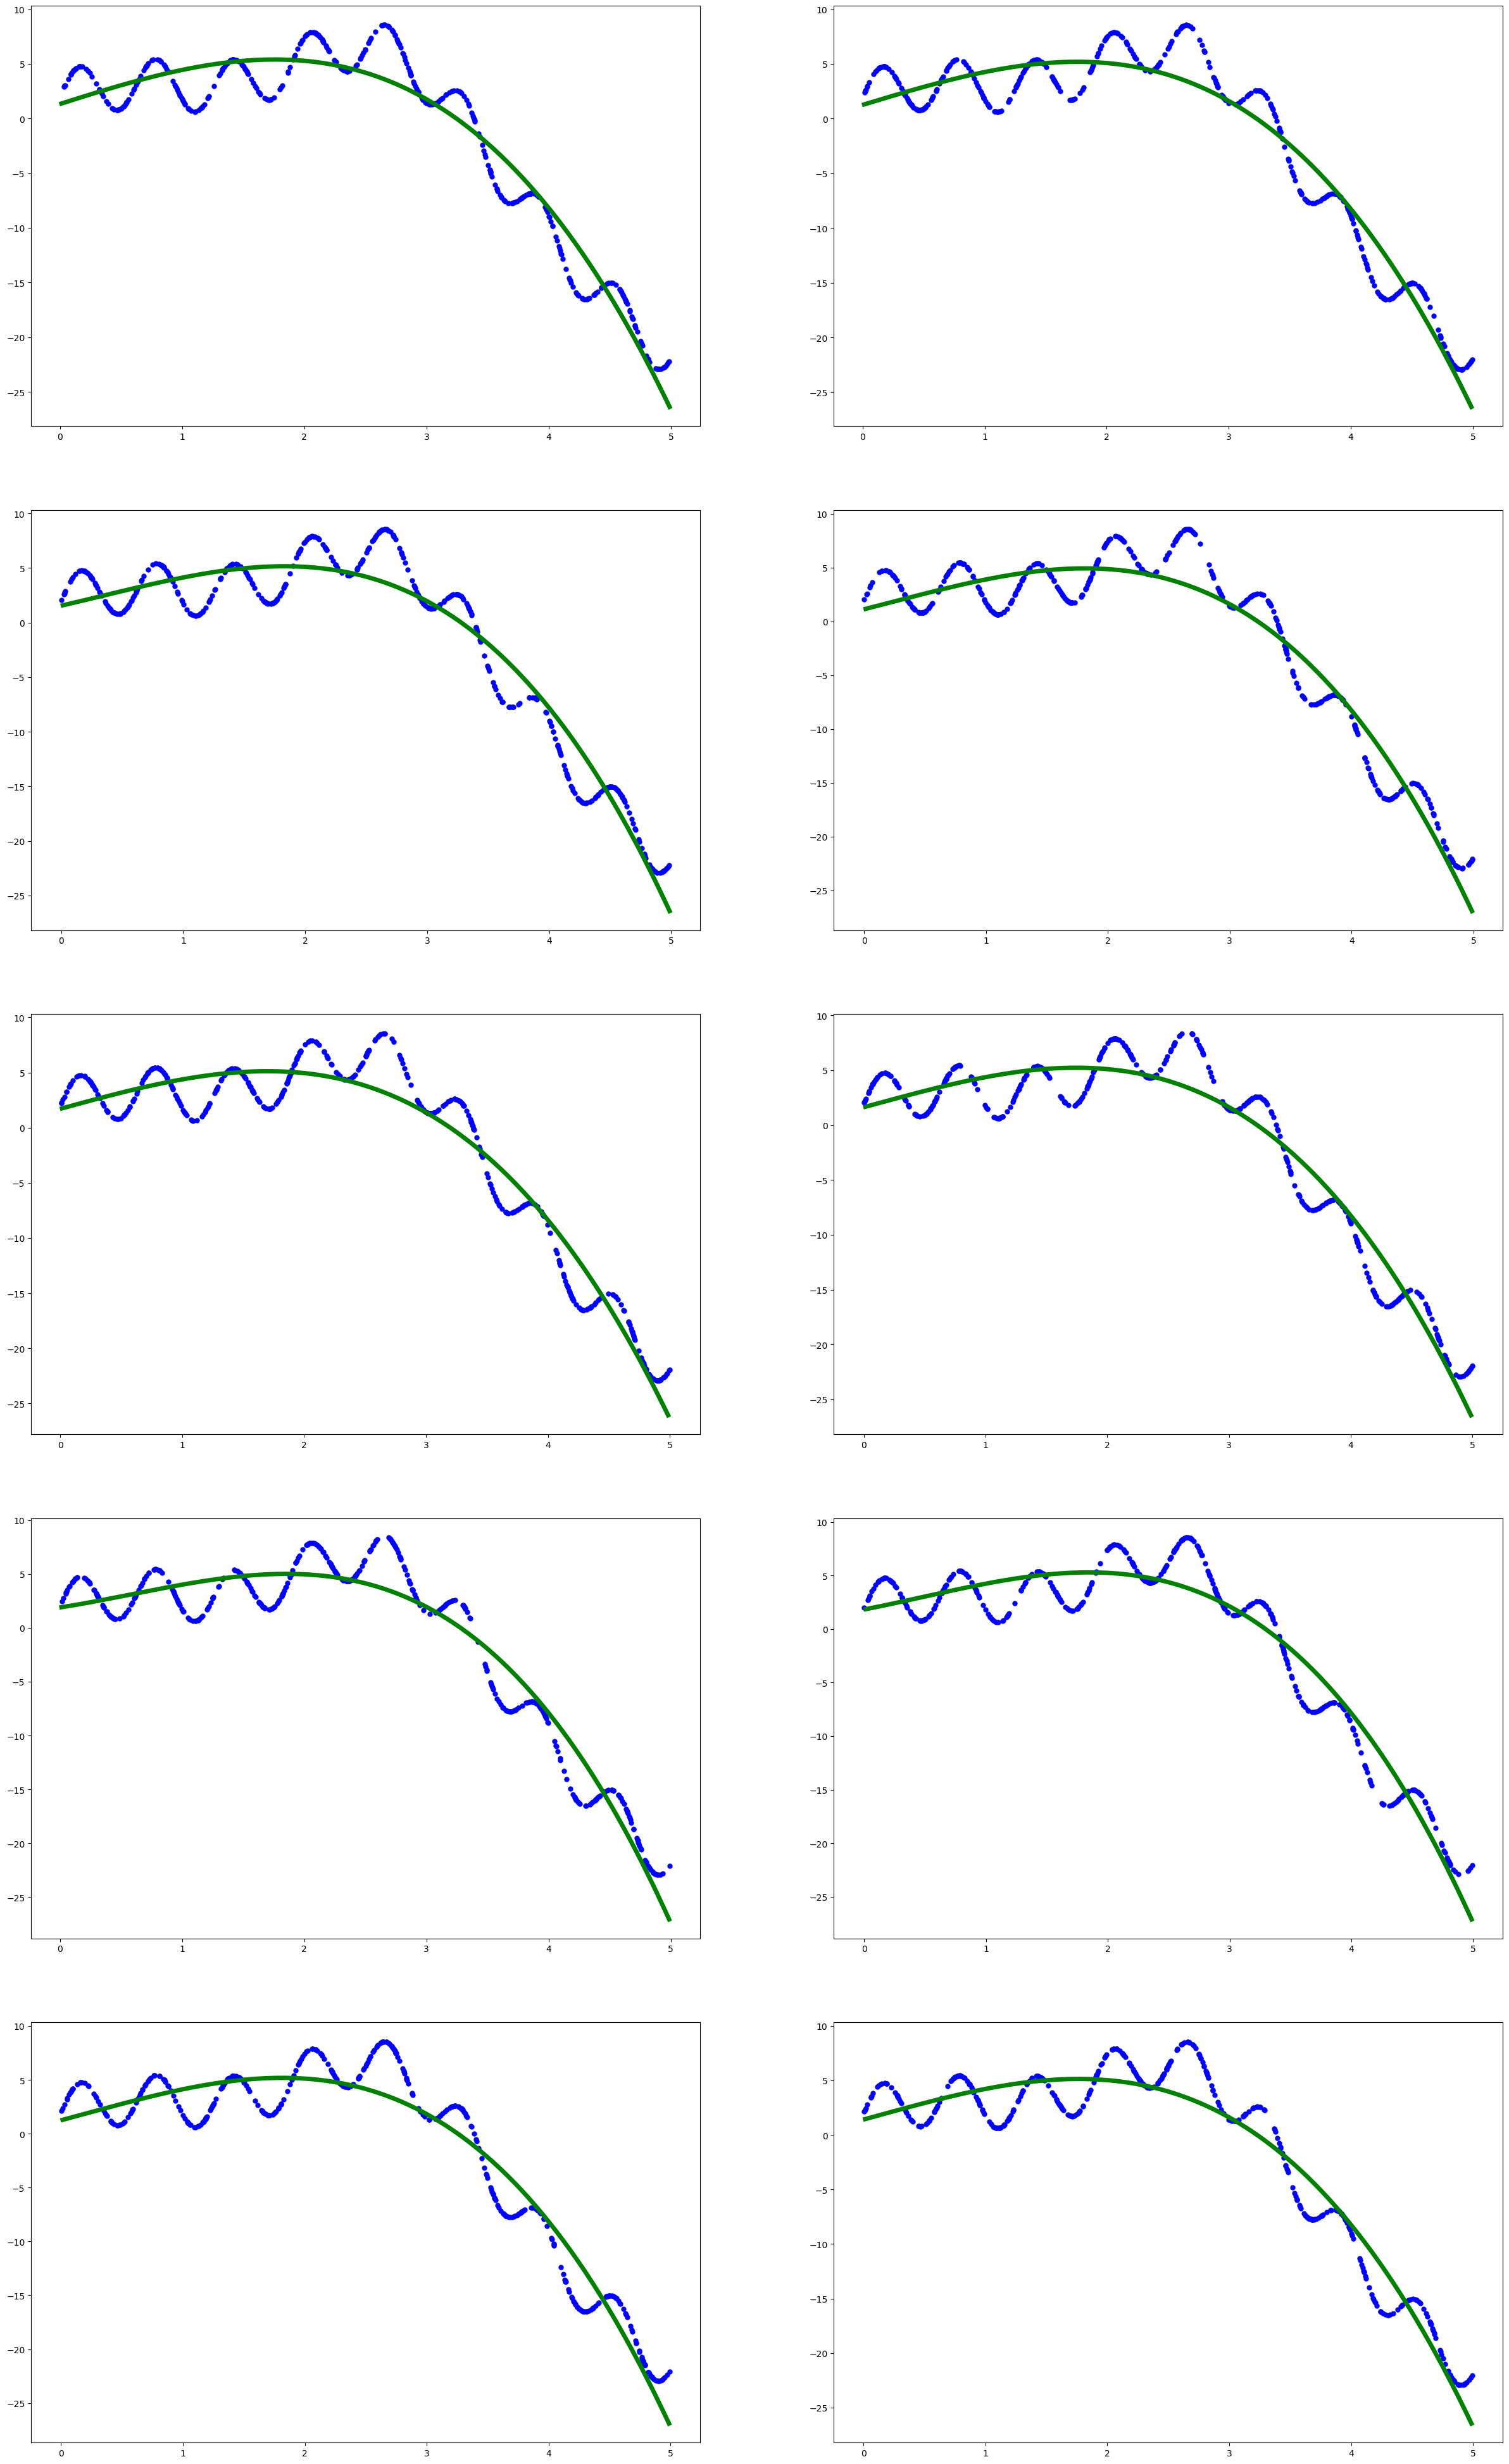

Model degree 4 with different datasets:


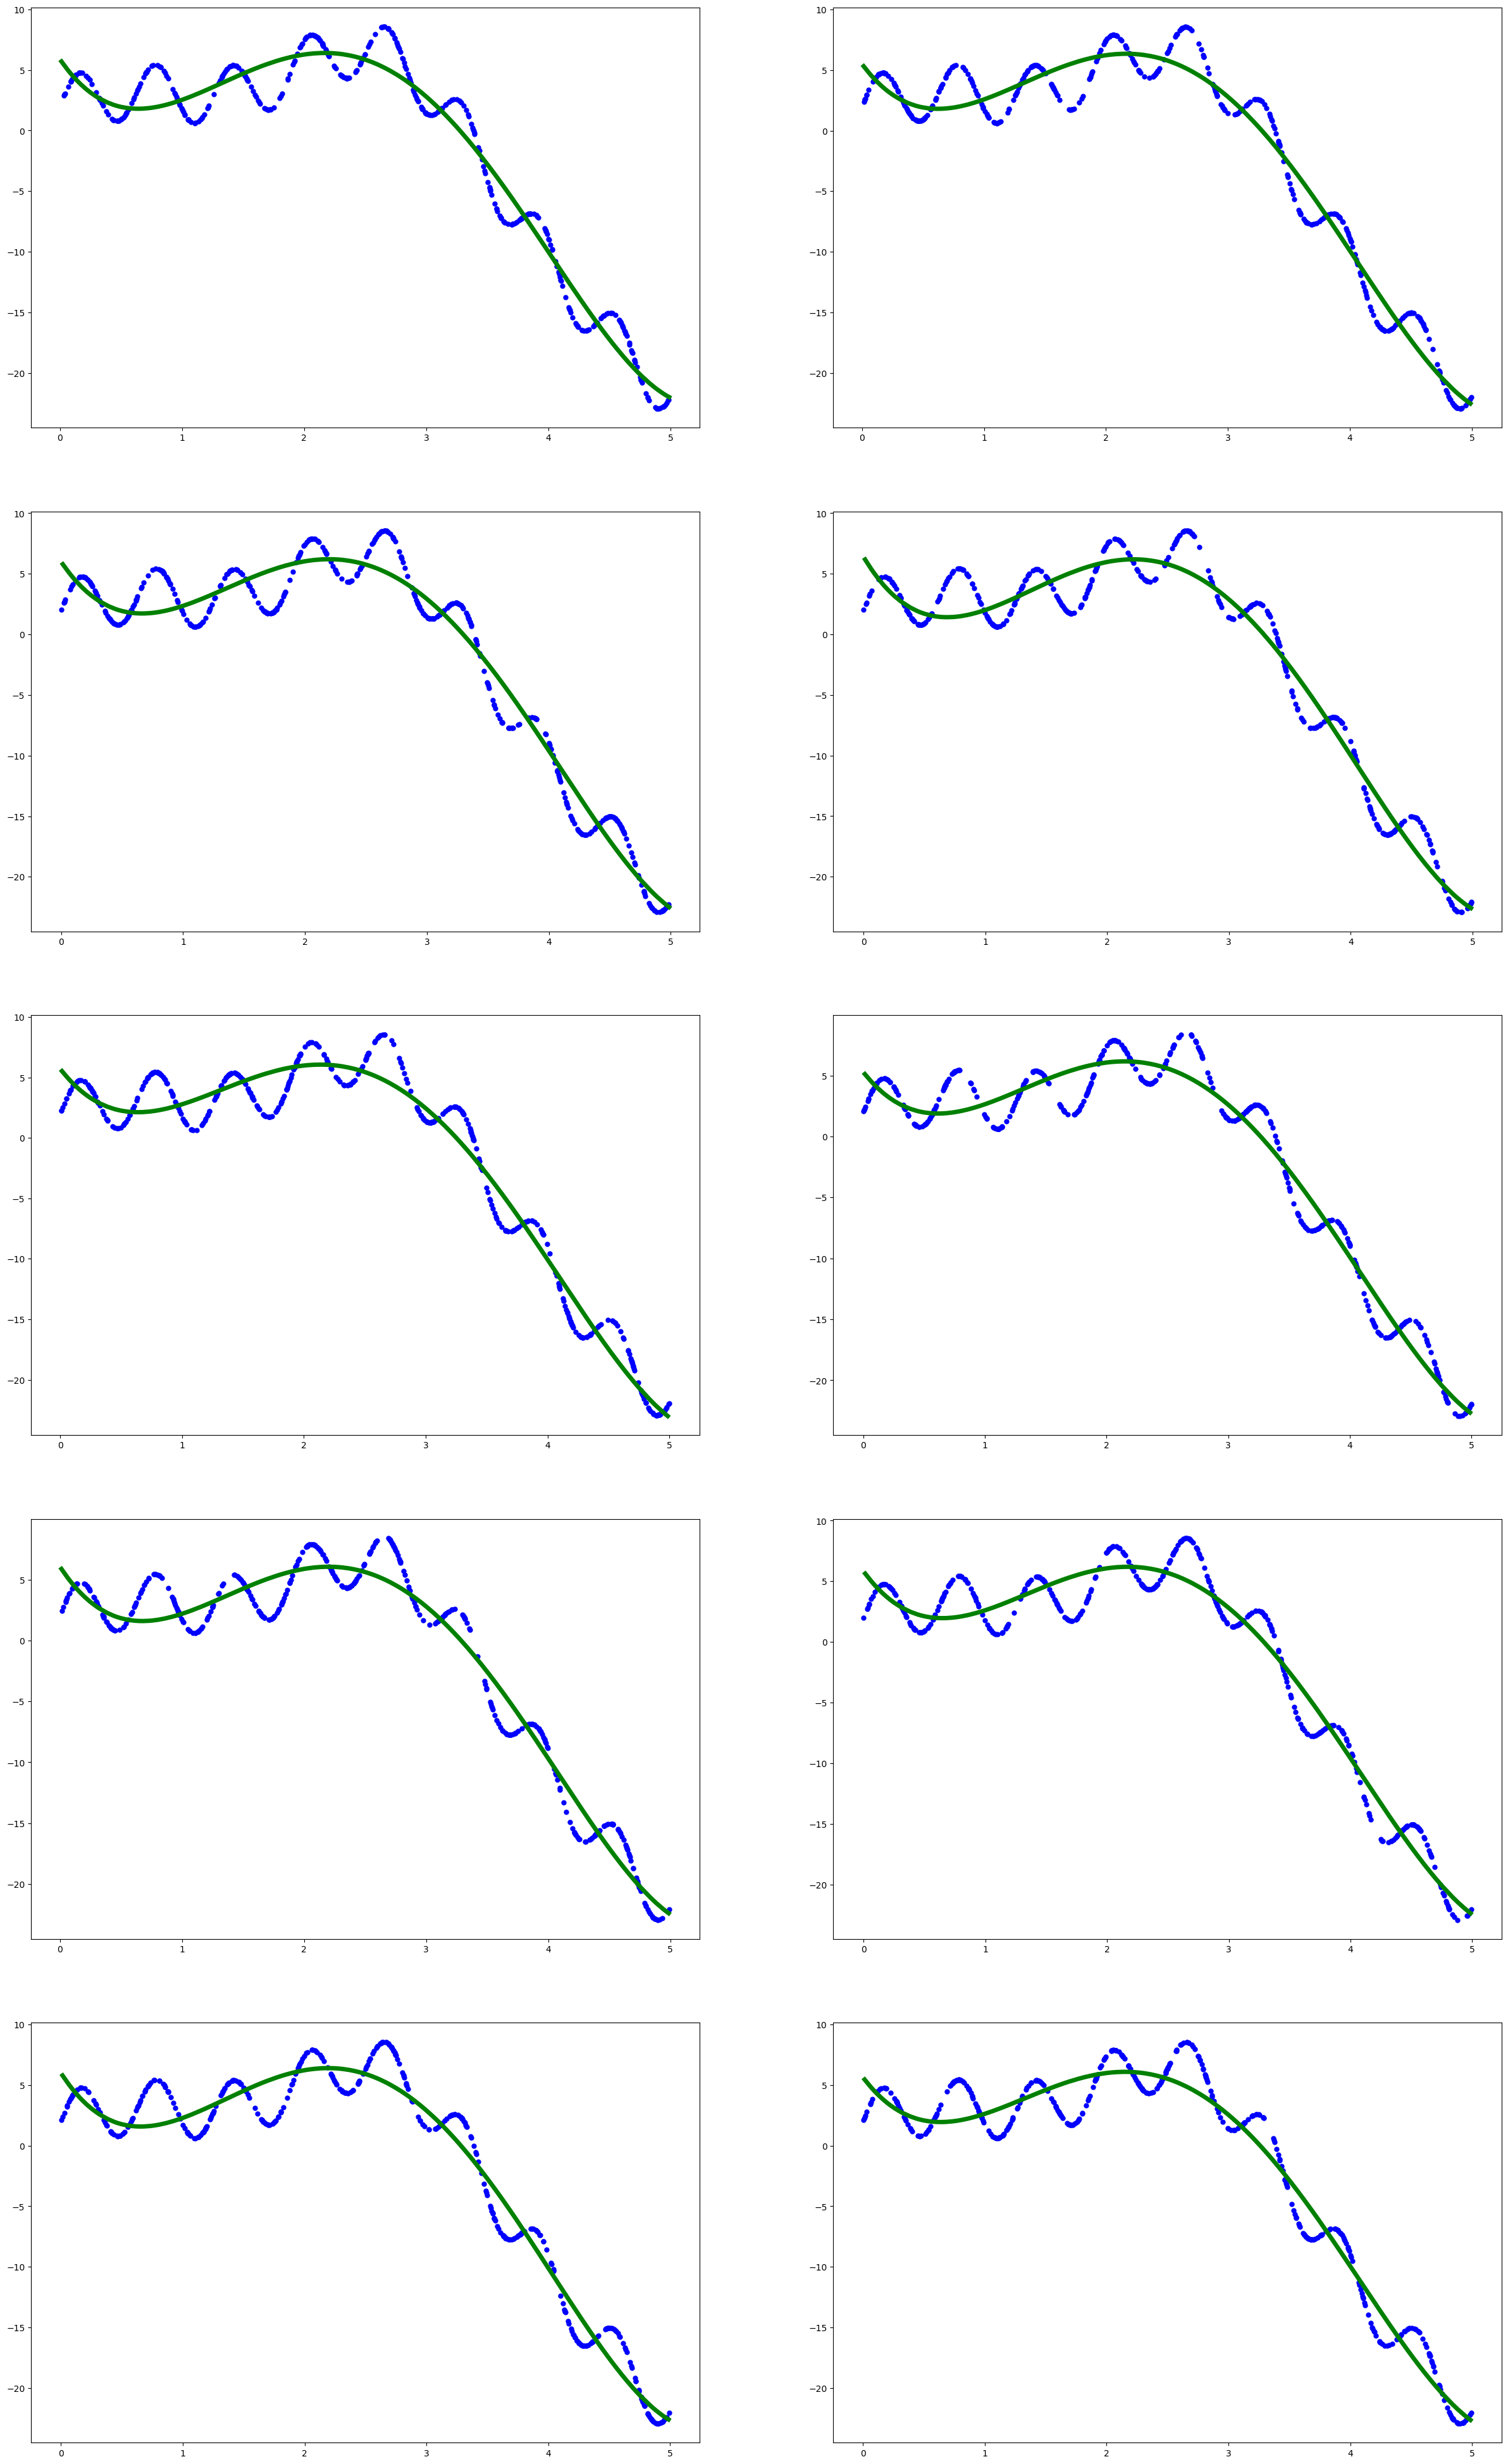

Model degree 5 with different datasets:


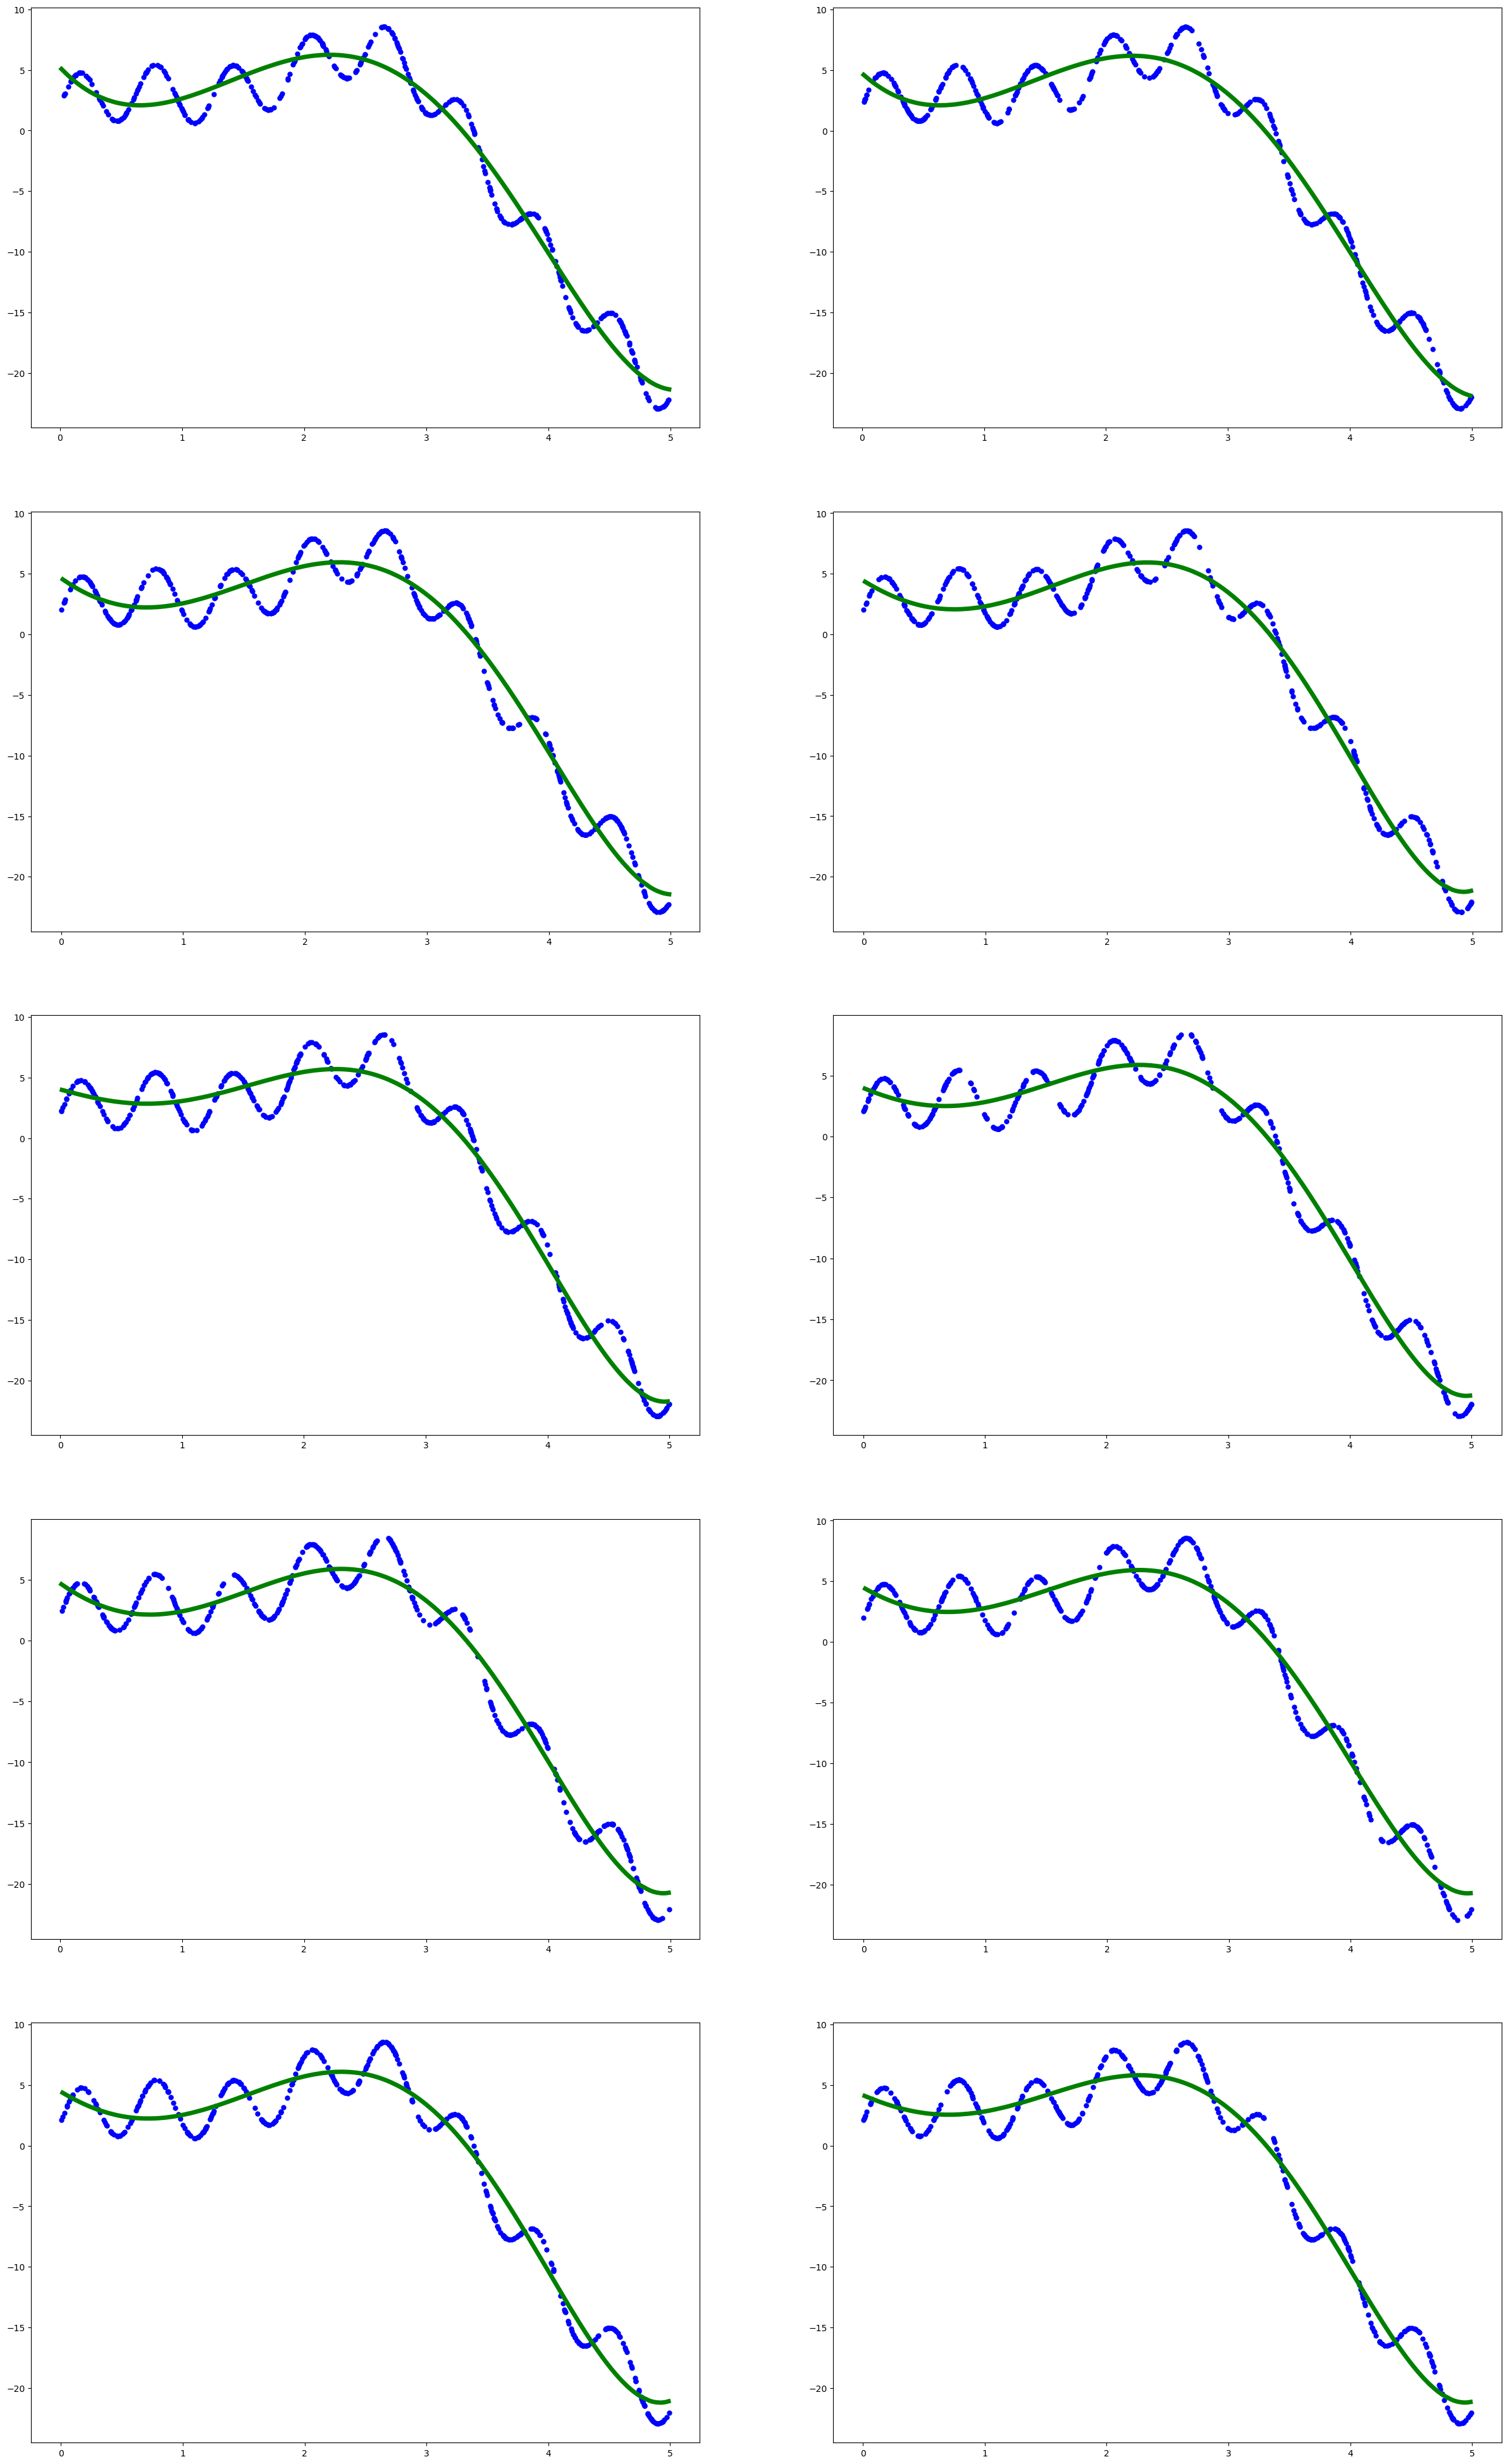

Model degree 6 with different datasets:


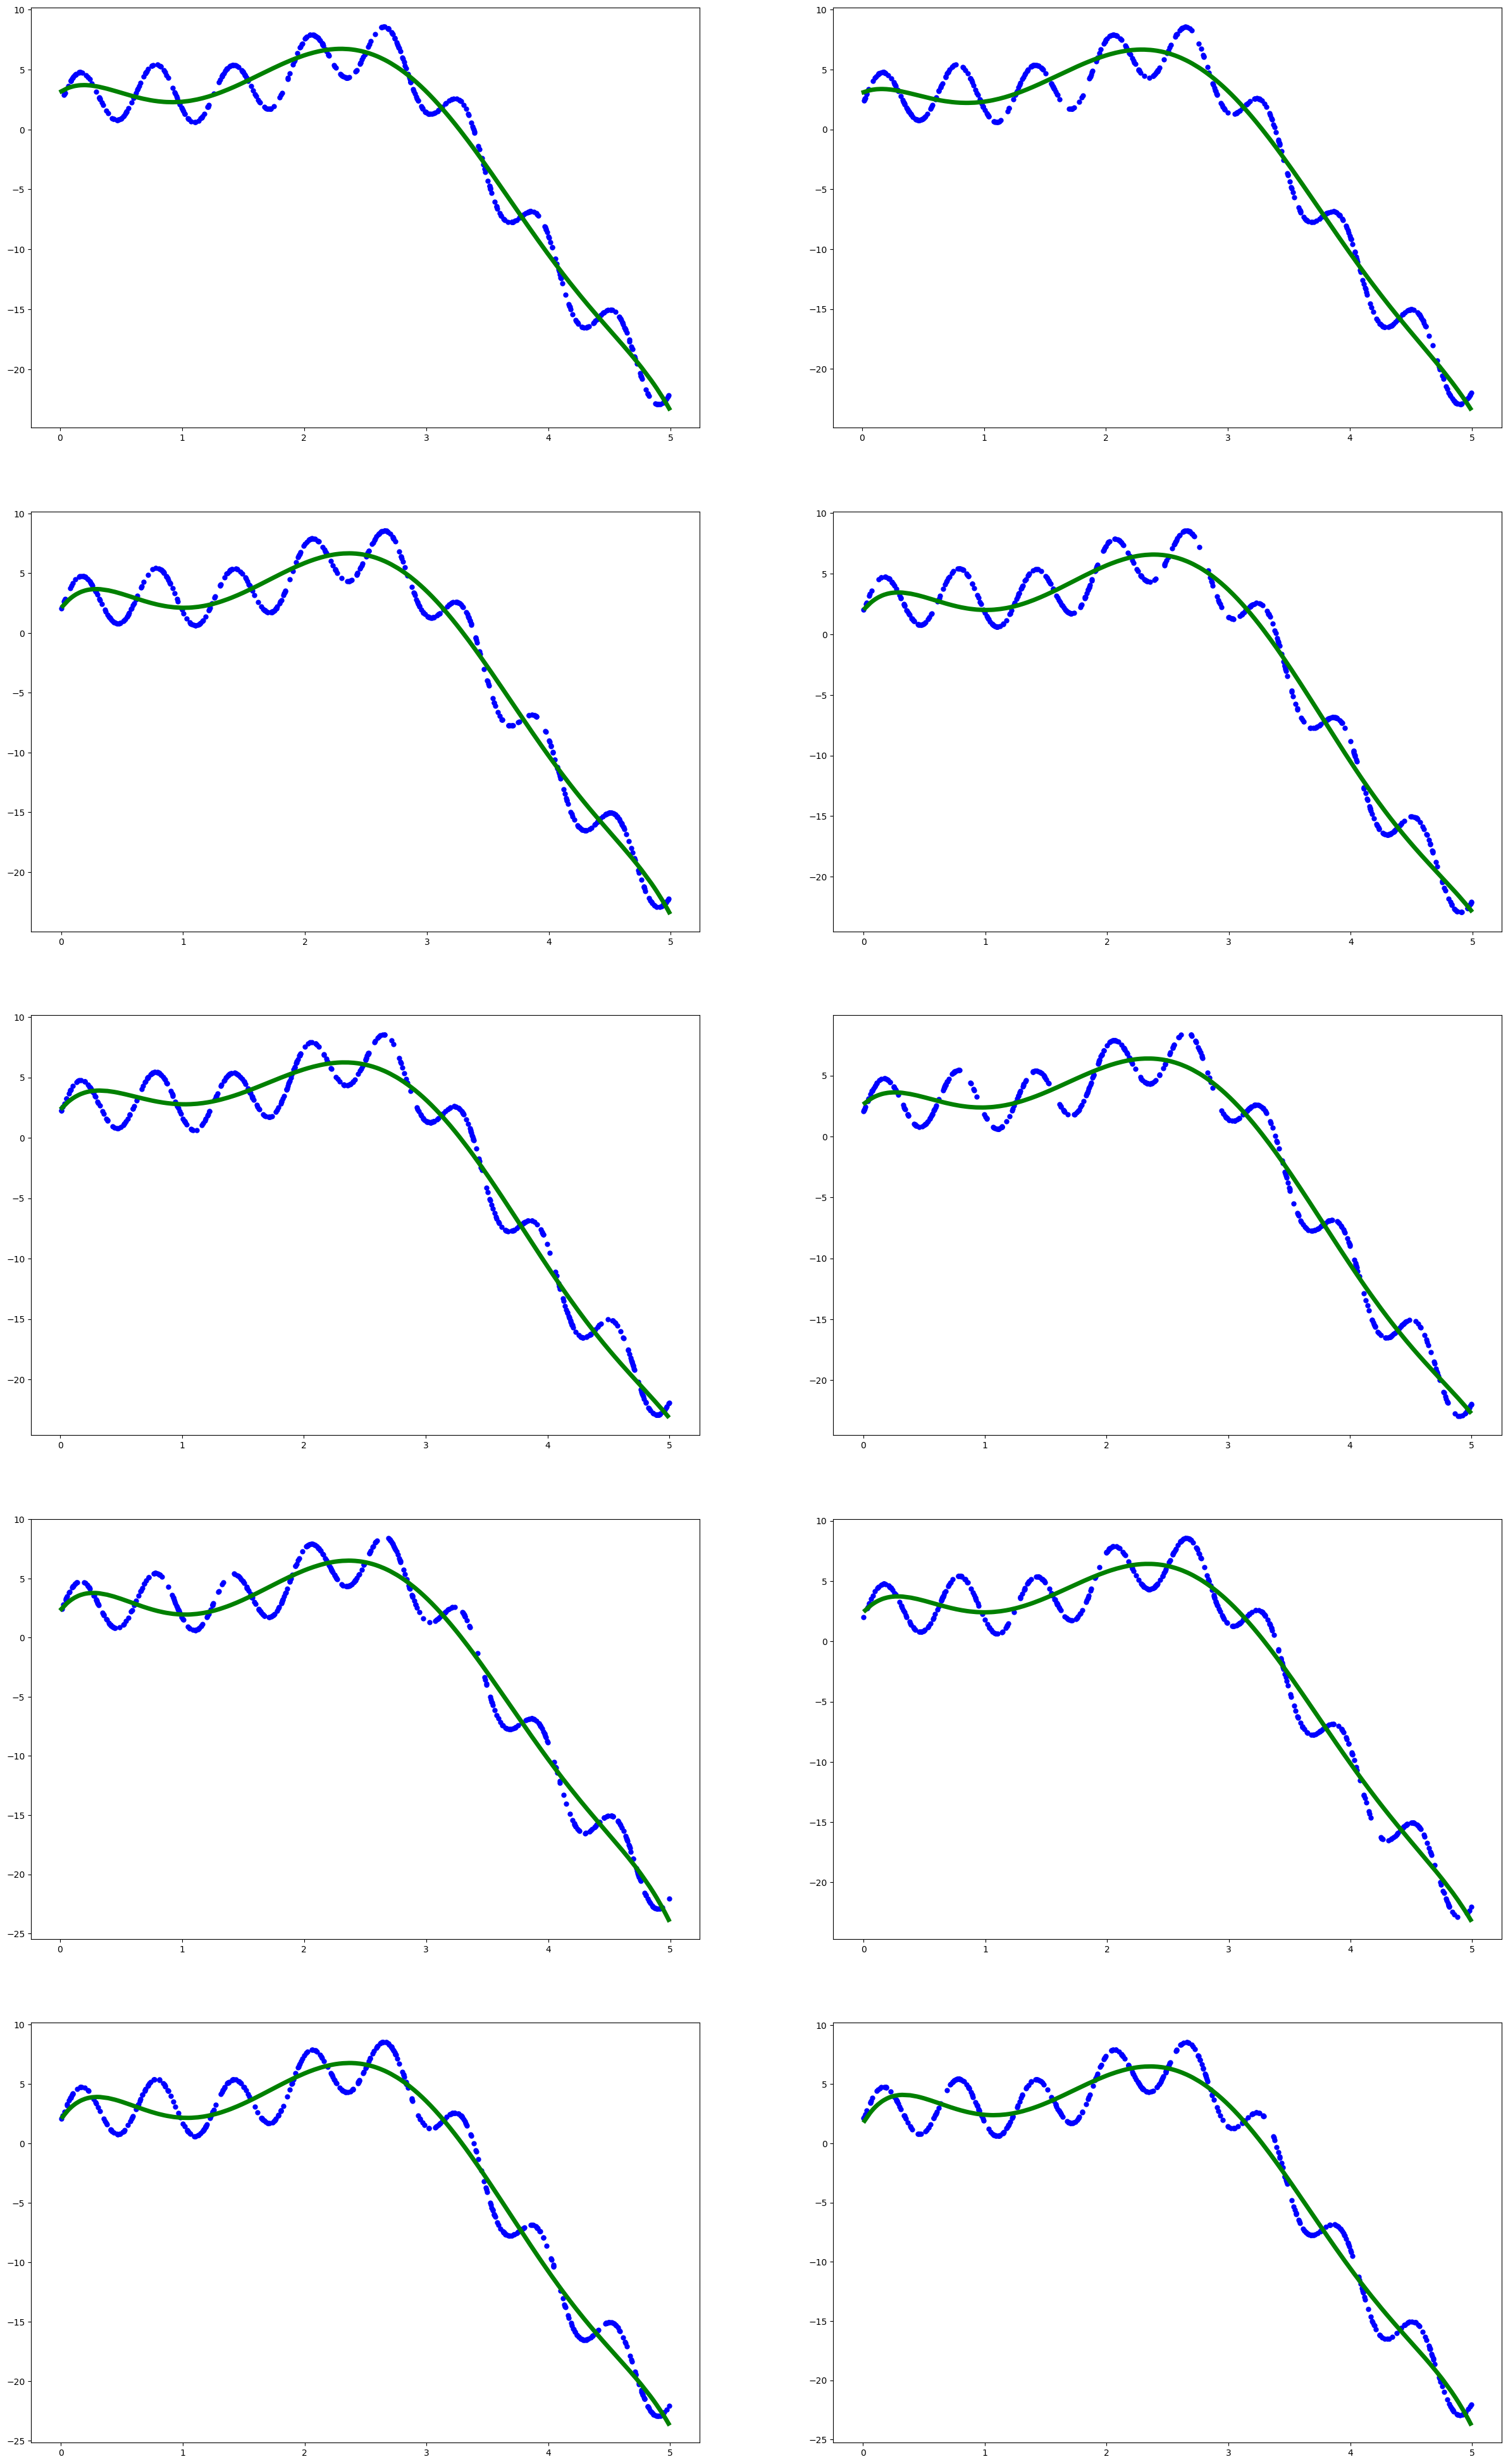

Model degree 7 with different datasets:


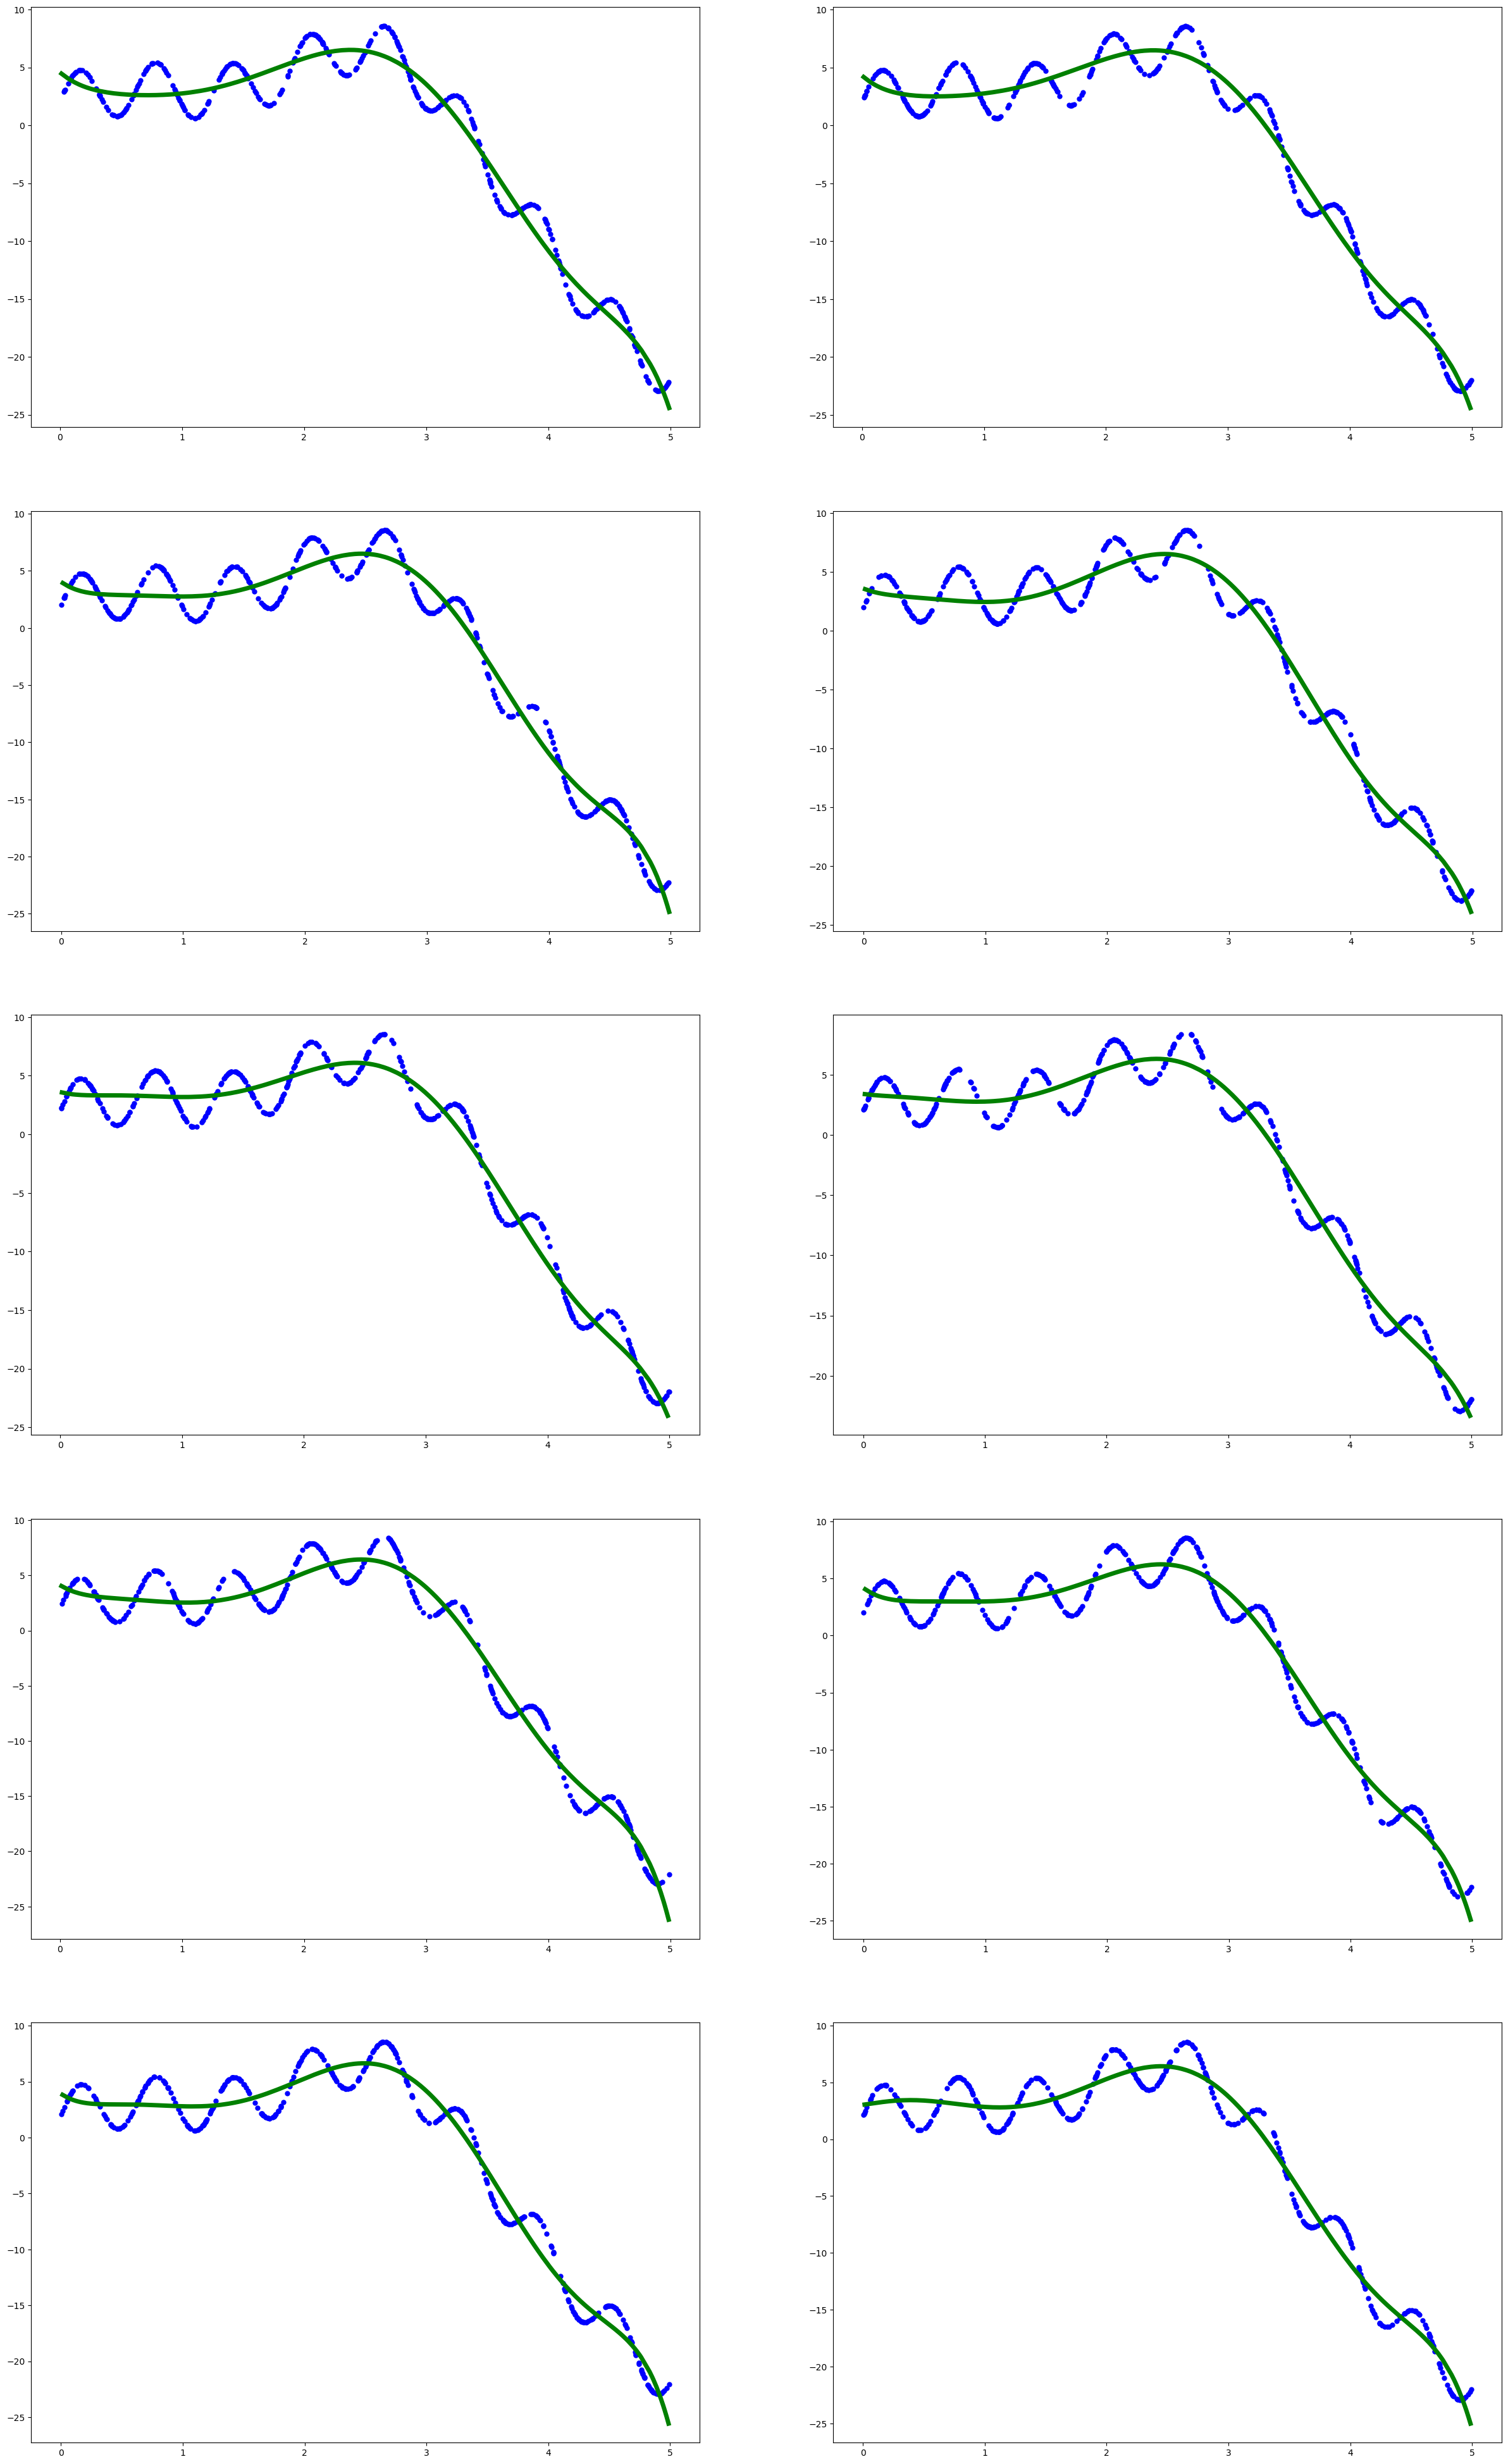

Model degree 8 with different datasets:


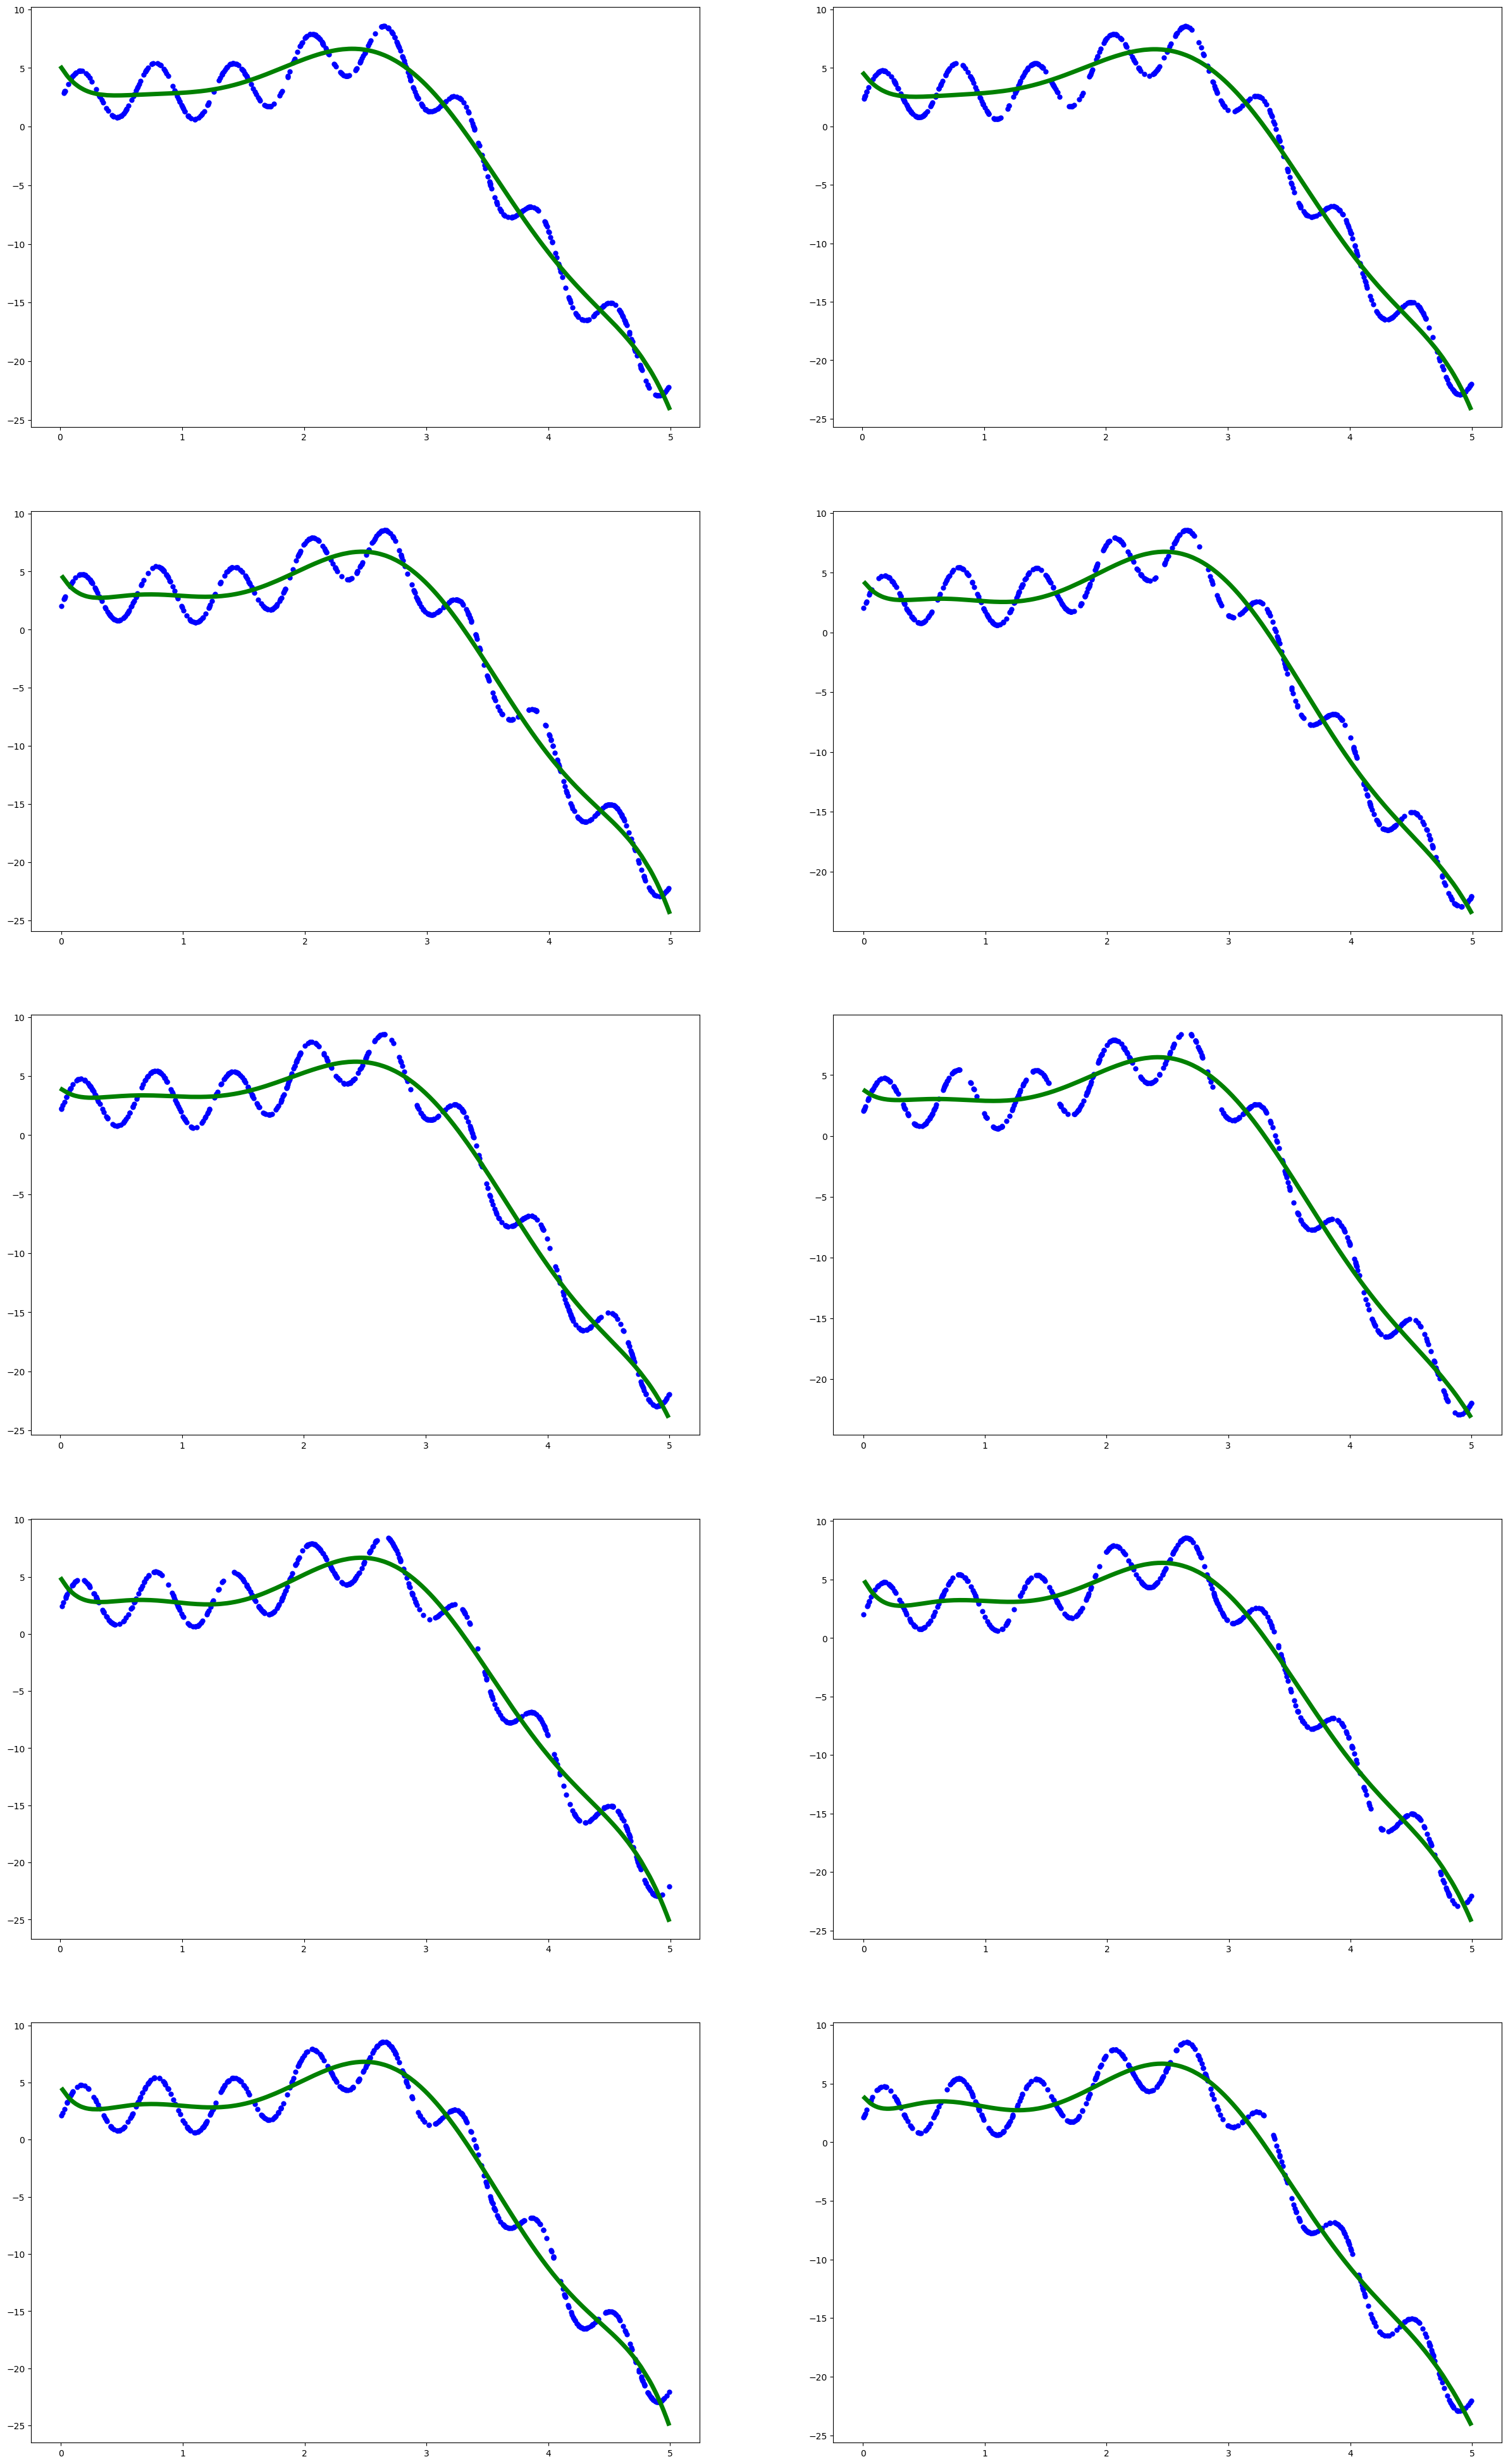

Model degree 9 with different datasets:


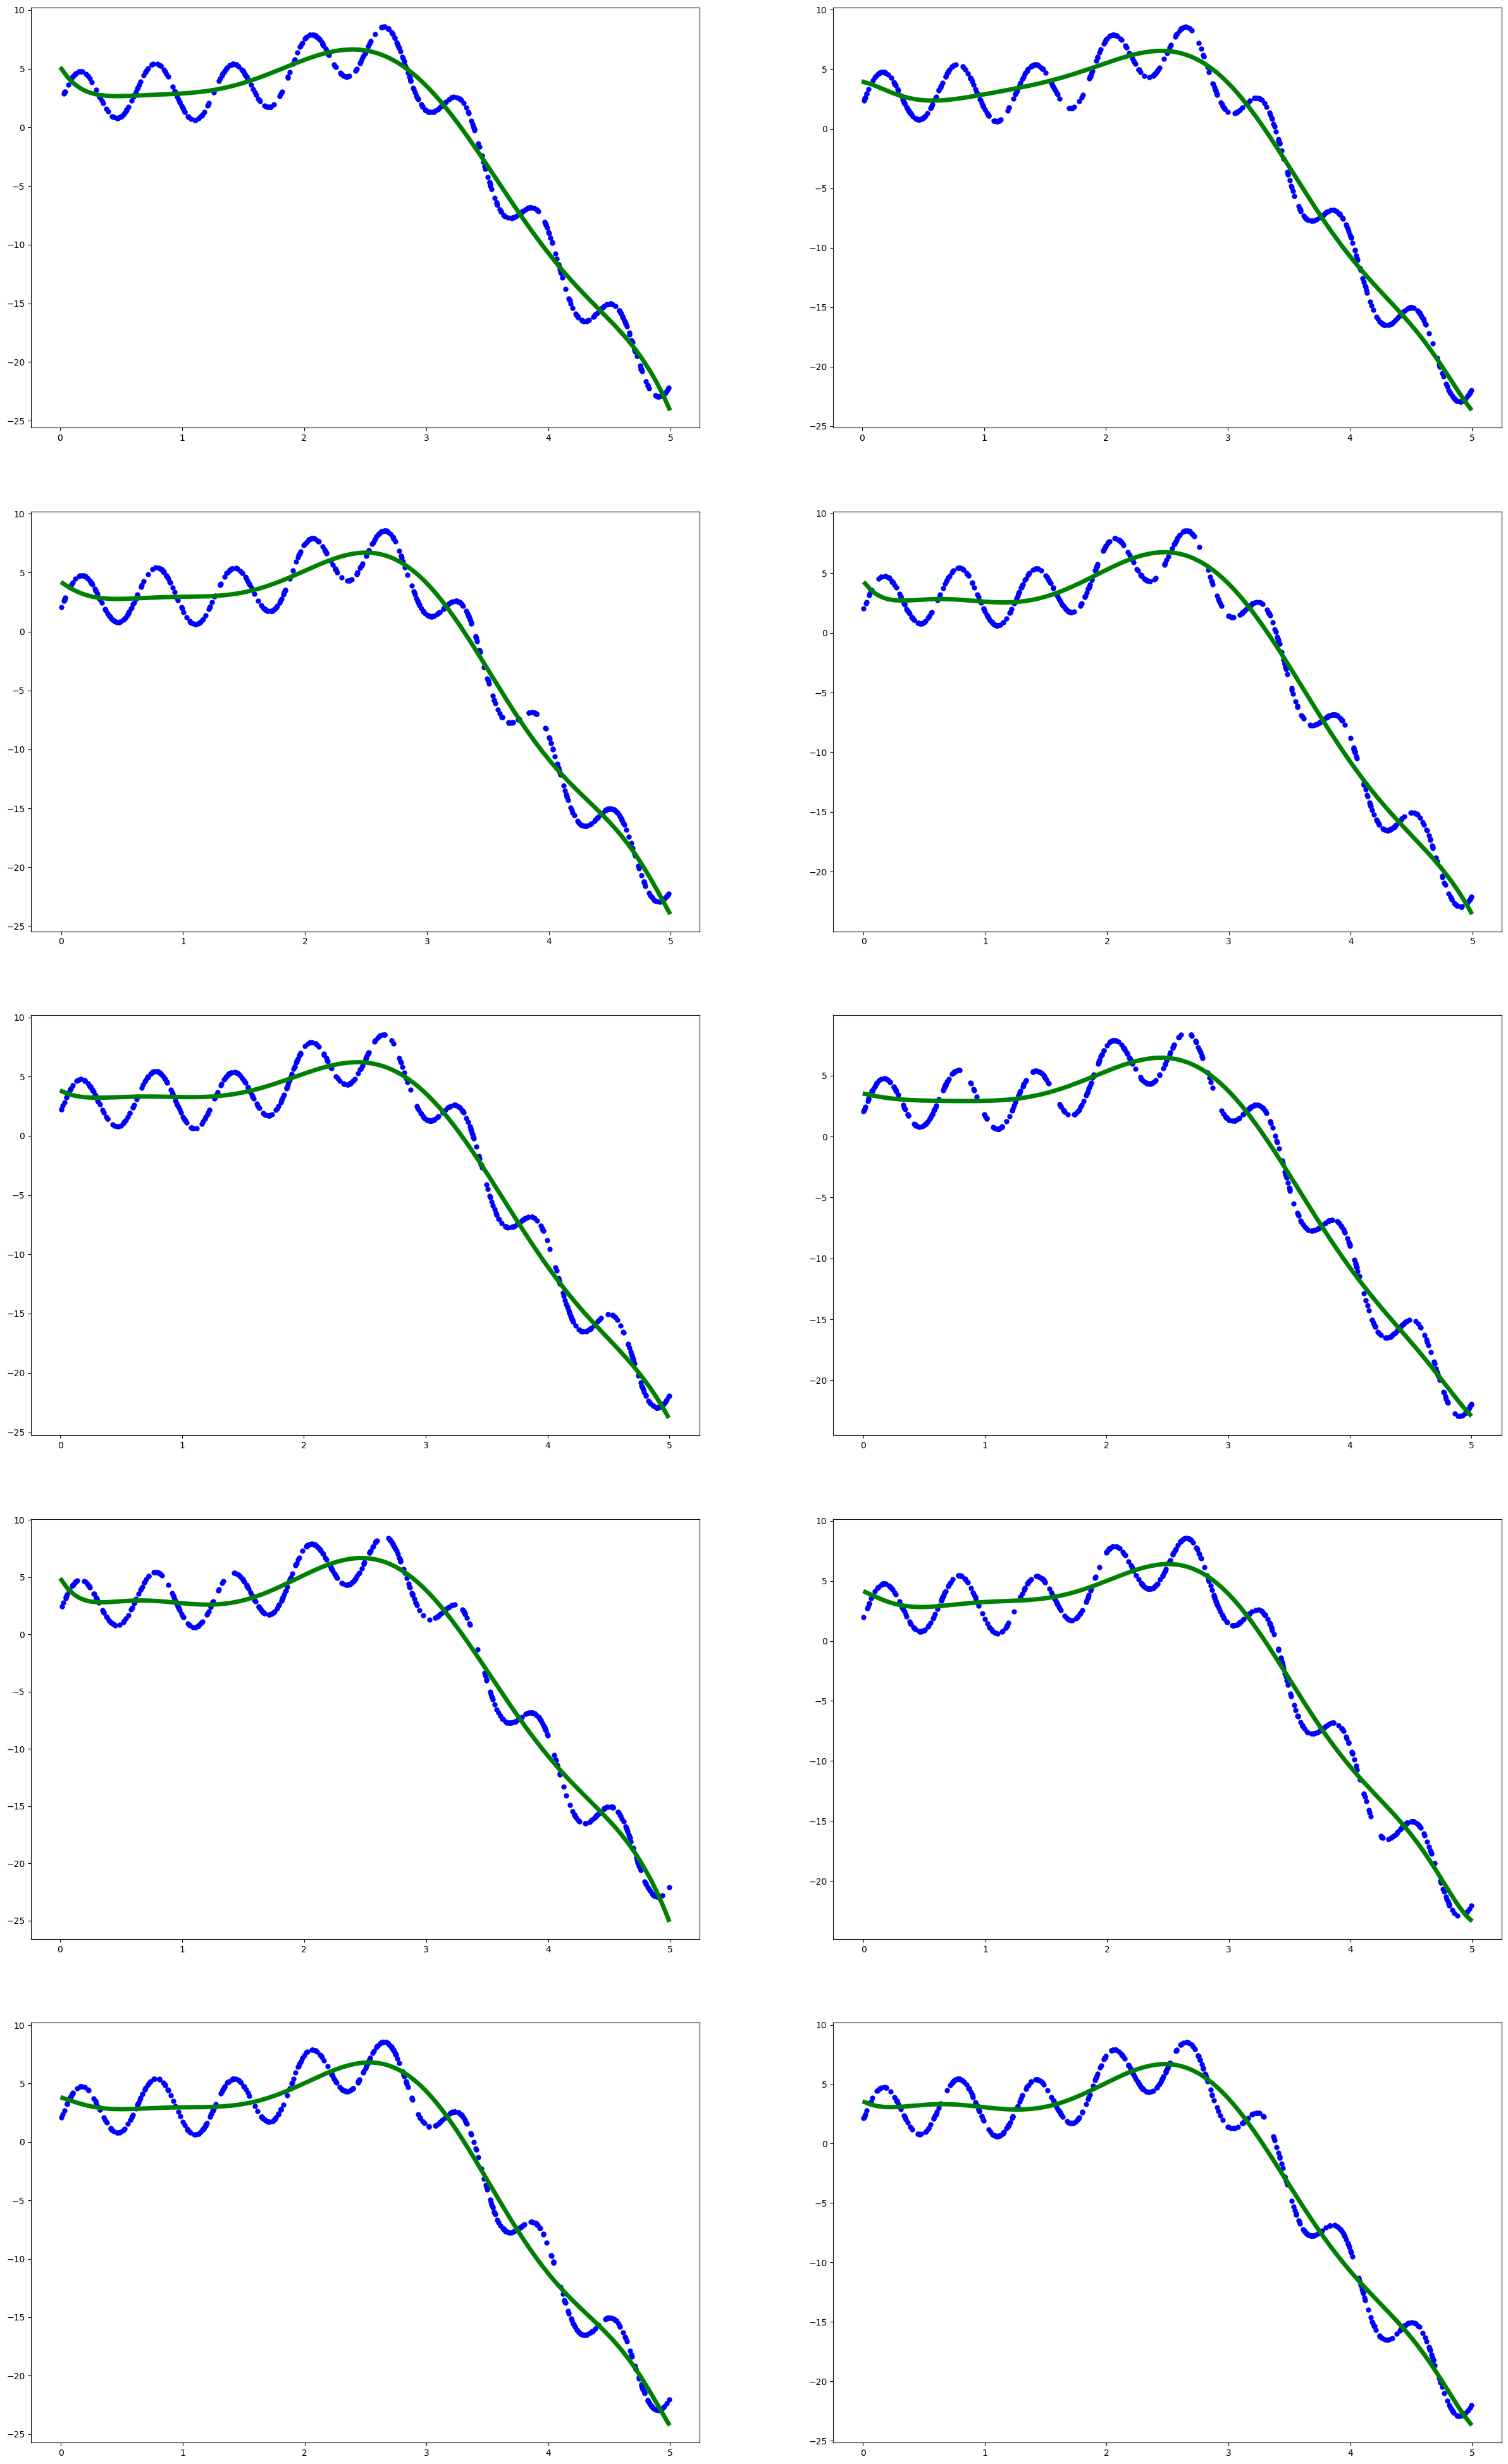

In [205]:

d = range(1, 10) # degrees of the polynomial regression
df_bias_var = pd.DataFrame(index=['bias', 'variance'])
for i in d:
    fig, axes = plt.subplots(5, 2, figsize=(30, 50))
    poly = PolynomialFeatures(i)
    index = 0 # index of ploting graph
    print('Model degree {} with different datasets:'.format(i))
    Ys_pred_var = np.ones((500, 10)) # list of biases of the model on all datasets 
    Ys_pred_bias = np.ones((500, 10))
    for k in diff_training_datasets:
        x_train, y_train, x_test, y_test = split_transform(k)
        axes[index // 2][index % 2].plot(k[:, 0], y_train, 'b.', markersize=10) # plot the dataset

        model = linear_model.LinearRegression().fit(x_train, y_train)
        y_pred = model.predict(x_test)
        Ys_pred_var[:, index] = y_pred
        Ys_pred_bias[:, index] = np.abs(y_pred-y_test)
        axes[index // 2][index % 2].plot(testing_set[:, 0], y_pred, 'g-', linewidth=5) # plot the model line on the dataset that it fits 
        index += 1
        
    df_bias_var['degree {}'.format(i)] = [np.average(np.average(Ys_pred_bias, axis=1), axis=0), np.average(np.var(Ys_pred_var, axis=1), axis=0)]
    plt.show()


In [206]:
df_bias_var.head()

degree 1  degree 2  degree 3  ...  degree 7  degree 8  degree 9
bias      4.693854  2.101133  1.937899  ...  1.379585  1.372279  1.370625
variance  0.152834  0.030740  0.033467  ...  0.048549  0.049606  0.053564

[2 rows x 9 columns]

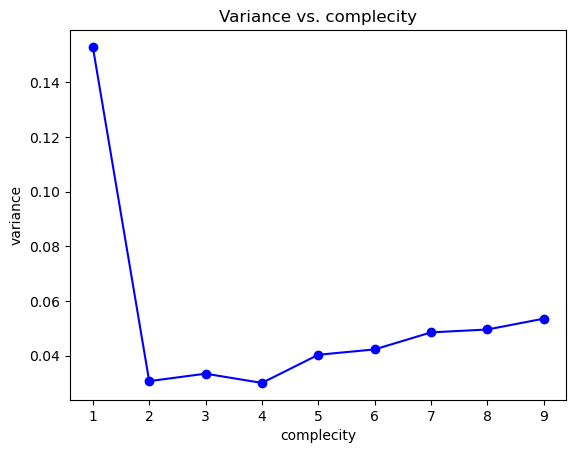

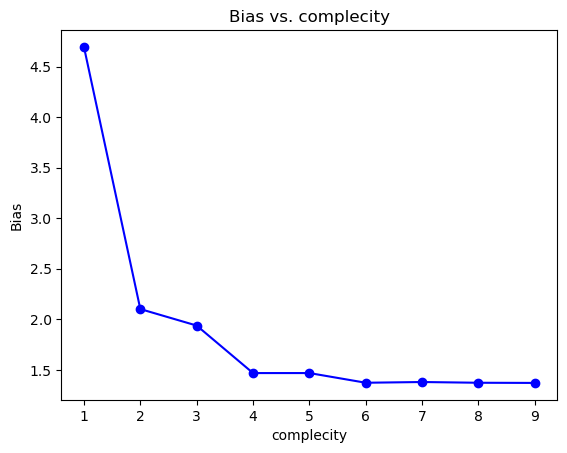

In [207]:
bias = df_bias_var.loc['bias', :].values
variance = df_bias_var.loc['variance'].values
degrees = range(1, 10)
# plotting variance vs. complecity
# fig, axes = plt.subplots(2)
plt.plot(degrees, variance, 'bo-')
plt.title('Variance vs. complecity')
plt.xlabel('complecity')
plt.ylabel('variance')
plt.show();
# plotting bias vs. complecity
plt.plot(degrees, bias, 'bo-')
plt.title('Bias vs. complecity')
plt.xlabel('complecity')
plt.ylabel('Bias')
plt.show();

## Report about what happens:
- As we can see above(two figures) we note that as we increase the complecity(order) of the model the bias and variance both decrease but at a certain order(threshold) they do not decrease any more(in case of variance it starts increasing after 4th order). This order is 4th one, if we increase the order more than this the model will overfit the data, so we should stop at 4th order.  
- In first orders 1 to 3 the bias was large so the model underfits in these orders